In [34]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import joblib
from imblearn.over_sampling import RandomOverSampler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [35]:
dataset = pd.read_csv('survey lung cancer.csv')

In [36]:
dataset

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,M,69,1,2,2,1,1,2,1,2,2,2,2,2,2,YES
1,M,74,2,1,1,1,2,2,2,1,1,1,2,2,2,YES
2,F,59,1,1,1,2,1,2,1,2,1,2,2,1,2,NO
3,M,63,2,2,2,1,1,1,1,1,2,1,1,2,2,NO
4,F,63,1,2,1,1,1,1,1,2,1,2,2,1,1,NO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
304,F,56,1,1,1,2,2,2,1,1,2,2,2,2,1,YES
305,M,70,2,1,1,1,1,2,2,2,2,2,2,1,2,YES
306,M,58,2,1,1,1,1,1,2,2,2,2,1,1,2,YES
307,M,67,2,1,2,1,1,2,2,1,2,2,2,1,2,YES


In [37]:
dataset.rename(columns={'FATIGUE ': 'FATIGUE'},inplace=True)
dataset.rename(columns={'ALLERGY ': 'ALLERGY'},inplace=True)

In [38]:
dataset.drop_duplicates(keep='first',inplace= True)

In [39]:
dataset['GENDER'].replace({'M':1,'F':0 },inplace=True)
dataset

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,1,69,1,2,2,1,1,2,1,2,2,2,2,2,2,YES
1,1,74,2,1,1,1,2,2,2,1,1,1,2,2,2,YES
2,0,59,1,1,1,2,1,2,1,2,1,2,2,1,2,NO
3,1,63,2,2,2,1,1,1,1,1,2,1,1,2,2,NO
4,0,63,1,2,1,1,1,1,1,2,1,2,2,1,1,NO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
279,0,59,1,2,2,2,1,1,2,2,1,2,1,2,1,YES
280,0,59,2,1,1,1,2,2,2,1,1,1,2,1,1,NO
281,1,55,2,1,1,1,1,2,2,1,1,1,2,1,2,NO
282,1,46,1,2,2,1,1,1,1,1,1,1,1,2,2,NO


In [40]:
dataset['LUNG_CANCER'].replace({'YES':1,'NO':0 },inplace=True)
dataset

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,1,69,1,2,2,1,1,2,1,2,2,2,2,2,2,1
1,1,74,2,1,1,1,2,2,2,1,1,1,2,2,2,1
2,0,59,1,1,1,2,1,2,1,2,1,2,2,1,2,0
3,1,63,2,2,2,1,1,1,1,1,2,1,1,2,2,0
4,0,63,1,2,1,1,1,1,1,2,1,2,2,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
279,0,59,1,2,2,2,1,1,2,2,1,2,1,2,1,1
280,0,59,2,1,1,1,2,2,2,1,1,1,2,1,1,0
281,1,55,2,1,1,1,1,2,2,1,1,1,2,1,2,0
282,1,46,1,2,2,1,1,1,1,1,1,1,1,2,2,0


In [41]:
for i in dataset.columns[2:15]:
    dataset.replace({f'{i}':{2:1,1:0}},inplace=True)

In [42]:
dataset

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,1,69,0,1,1,0,0,1,0,1,1,1,1,1,1,1
1,1,74,1,0,0,0,1,1,1,0,0,0,1,1,1,1
2,0,59,0,0,0,1,0,1,0,1,0,1,1,0,1,0
3,1,63,1,1,1,0,0,0,0,0,1,0,0,1,1,0
4,0,63,0,1,0,0,0,0,0,1,0,1,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
279,0,59,0,1,1,1,0,0,1,1,0,1,0,1,0,1
280,0,59,1,0,0,0,1,1,1,0,0,0,1,0,0,0
281,1,55,1,0,0,0,0,1,1,0,0,0,1,0,1,0
282,1,46,0,1,1,0,0,0,0,0,0,0,0,1,1,0


In [43]:
dataset = dataset[['AGE','GENDER', 'SMOKING','YELLOW_FINGERS','ANXIETY','PEER_PRESSURE','CHRONIC DISEASE','FATIGUE','ALLERGY','WHEEZING','ALCOHOL CONSUMING','COUGHING','SHORTNESS OF BREATH','SWALLOWING DIFFICULTY','CHEST PAIN','LUNG_CANCER']]

In [44]:
dataset

,AGE,GENDER,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,69,1,0,1,1,0,0,1,0,1,1,1,1,1,1,1
1,74,1,1,0,0,0,1,1,1,0,0,0,1,1,1,1
2,59,0,0,0,0,1,0,1,0,1,0,1,1,0,1,0
3,63,1,1,1,1,0,0,0,0,0,1,0,0,1,1,0
4,63,0,0,1,0,0,0,0,0,1,0,1,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
279,59,0,0,1,1,1,0,0,1,1,0,1,0,1,0,1
280,59,0,1,0,0,0,1,1,1,0,0,0,1,0,0,0
281,55,1,1,0,0,0,0,1,1,0,0,0,1,0,1,0
282,46,1,0,1,1,0,0,0,0,0,0,0,0,1,1,0


In [45]:
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

In [46]:
X_over,y_over=RandomOverSampler().fit_resample(X,y)

In [47]:
X_train, X_test, y_train, y_test = train_test_split(X_over, y_over, test_size = 0.20, random_state = 0)

In [48]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(C=4,max_iter= 1000,penalty= 'l2', solver= 'lbfgs',random_state = 0)
model.fit(X_train, y_train)

LogisticRegression(C=4, max_iter=1000, random_state=0)

In [49]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

y_pred = model.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[51  3]
 [ 5 37]]


0.9166666666666666

              precision    recall  f1-score   support

           0       0.91      0.94      0.93        54
           1       0.93      0.88      0.90        42

    accuracy                           0.92        96
   macro avg       0.92      0.91      0.91        96
weighted avg       0.92      0.92      0.92        96



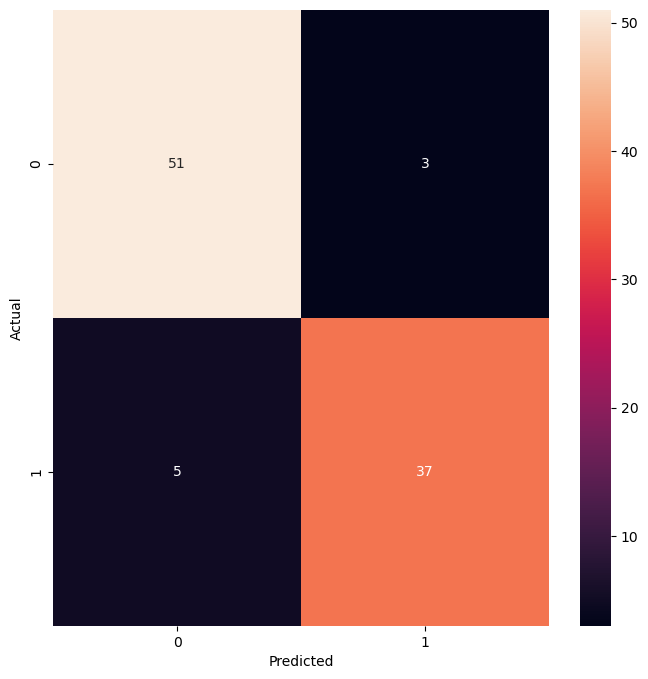

In [50]:
y_pred_svc=model.predict(X_test)
confusion_svc=confusion_matrix(y_test,y_pred_svc)
plt.figure(figsize=(8,8))
sns.heatmap(confusion_svc,annot=True)
plt.xlabel("Predicted")
plt.ylabel("Actual")
print(classification_report(y_test,y_pred_svc))

In [51]:
y = model.predict([[1, 50, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0]])
y[0]

0

In [53]:
import joblib

In [55]:
joblib.dump(model,'mesothelioma')

['mesothelioma']